In [26]:
from graphviz import Source
from sklearn.tree import export_graphviz
import pandas as pd

data = pd.read_csv('dogs_cats.csv')
data


,Unnamed: 0,comprimento,peso,classe
0,0,45.231415,431.548671,cachorro
1,1,38.003753,517.870914,gato
2,2,53.608592,444.025762,cachorro
3,3,39.315731,524.066579,gato
4,4,45.581301,450.552000,cachorro
...,...,...,...,...
1995,1995,37.590457,587.274926,gato
1996,1996,43.818870,416.846089,cachorro
1997,1997,36.876470,483.215531,gato
1998,1998,49.415613,514.637485,cachorro


In [28]:
X = data.drop(['classe'], axis=1)

In [29]:
y = data['classe']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [31]:
X_train.shape, X_test.shape

((1340, 3), (660, 3))

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state=0)

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9636


In [40]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

In [41]:
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)


In [42]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9636


In [43]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [44]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

comprimento    0.628755
peso           0.312117
Unnamed: 0     0.059128
dtype: float64

In [47]:
pip install seaborn


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 5.6 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.8 MB 5.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.8 MB 5.9 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 5.7 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 5.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 5.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 7.1 MB/s eta 0:00:01
   -------------------------------------- - 2.1/2.2 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.2 MB/s eta 0:00:00
   ----------------------

In [48]:
import seaborn as sns

<Axes: xlabel='None', ylabel='None'>

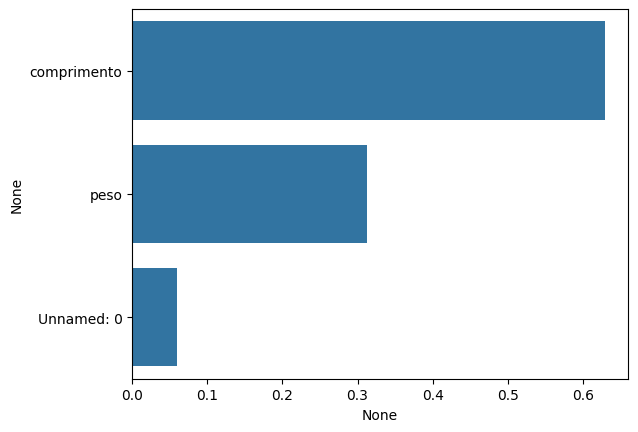

In [49]:
sns.barplot(x=feature_scores, y=feature_scores.index)

In [50]:
import matplotlib.pyplot as plt

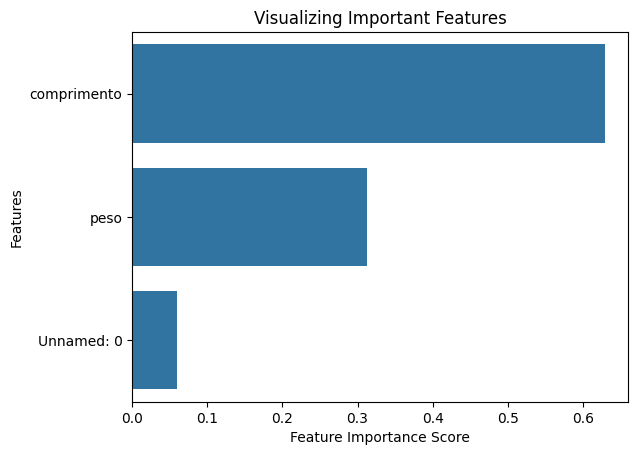

In [53]:
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()